In [1]:
import tensorflow as tf

url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg'
file_name = 'YellowLabradorLooking_new.jpg'
path = tf.keras.utils.get_file(file_name, url)

90112/83281 [================================] - 0s 1us/step


In [4]:
img = tf.io.read_file(path)
img = tf.image.decode_image(img, channels=3)
print(img.shape)
print(type(img))

(577, 700, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [6]:
print(tf.math.reduce_min(img))
print(tf.math.reduce_max(img))

tf.Tensor(0, shape=(), dtype=uint8)
tf.Tensor(255, shape=(), dtype=uint8)


In [7]:
img = tf.image.convert_image_dtype(img, tf.float32)
print(tf.math.reduce_min(img))
print(tf.math.reduce_max(img))

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


In [ ]:
# clip_by_value

In [8]:
data = tf.random.normal((100, 100, 3))
print(tf.math.reduce_min(data))
print(tf.math.reduce_max(data))

tf.Tensor(-3.9524198, shape=(), dtype=float32)
tf.Tensor(4.3451777, shape=(), dtype=float32)


In [9]:
data = tf.clip_by_value(data, clip_value_min=0.0, clip_value_max=1.0)
print(tf.math.reduce_min(data))
print(tf.math.reduce_max(data))

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


In [ ]:
# tf.add_n

In [10]:
result = tf.add_n([1, 2, 3])
print(result)

tf.Tensor(6, shape=(), dtype=int32)


In [ ]:
# load image

In [2]:
import PIL.Image
import tensorflow as tf
import matplotlib.pyplot as plt
import IPython.display as display
import numpy as np

In [3]:
# Define a function to load an image and limit its maximum dimension to 512 pixels
def load_img(path_to_img):
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)  
    img = tf.image.resize(img, (422, 512))
    img = img[tf.newaxis, :]

    return img

In [4]:
def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)

    plt.imshow(image)
    if title:
        plt.title(title)

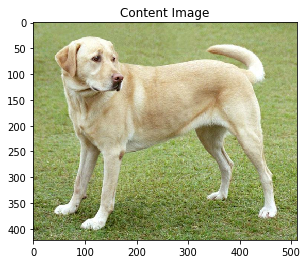

In [5]:
url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg'
file_name = 'YellowLabradorLooking_new.jpg'
path = tf.keras.utils.get_file(file_name, url)

image = load_img(path)
imshow(image, 'Content Image')

In [6]:
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

In [7]:
image = tf.random.uniform( (400,400,3), minval=0.0, maxval=1.5)
print(image.shape)
print(tf.math.reduce_min(image))
print(tf.math.reduce_max(image))

(400, 400, 3)
tf.Tensor(3.5762787e-07, shape=(), dtype=float32)
tf.Tensor(1.4999962, shape=(), dtype=float32)


In [8]:
def clip_0_1(image):
    return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

image = clip_0_1(image)
print(tf.math.reduce_min(image))
print(tf.math.reduce_max(image))

tf.Tensor(3.5762787e-07, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


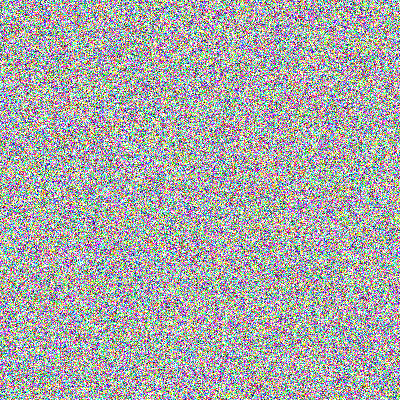

In [9]:
display.display(tensor_to_image(image))

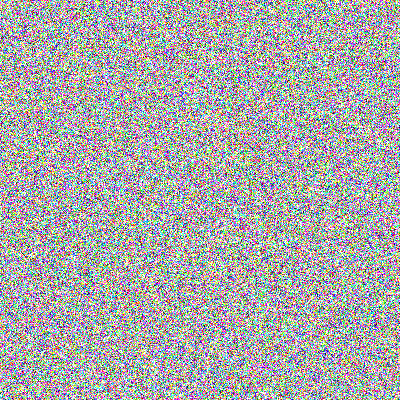

In [12]:
for _ in range(100):
    image = tf.random.uniform( (400,400,3), minval=0.0, maxval=1.5)
    image = clip_0_1(image)    
    
    display.clear_output(wait=True)
    display.display(tensor_to_image(image))